## **Instalação das Ferramentas e Bibliotecas**

Nesta seção, serão instaladas as principais bibliotecas utilizadas para análise de dados em Python:

- **pandas**: manipulação e análise de dados
- **matplotlib**: visualização gráfica
- **numpy**: operações numéricas e vetoriais
- **scikit-learn**: modelagem e machine learning
- **seaborn**: visualização estatística avançada

Essas ferramentas são essenciais para manipulação, visualização e modelagem de dados ao longo do notebook.


In [57]:

%pip install -U pandas matplotlib numpy scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.


# **Etapa 1: Coleta, Limpeza e EDA**

**1. Importação e Visualização Inicial:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Importar o CSV no Pandas  
&nbsp;&nbsp;&nbsp;&nbsp;• Verificar estatísticas básicas (`.describe()`, `.info()`)

**2. Tratamento de Dados:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Tratar valores faltantes e inconsistências

**3. Engenharia de Variáveis:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Converter variáveis categóricas via *One-Hot Encoding*  
&nbsp;&nbsp;&nbsp;&nbsp;• Escalonar variáveis numéricas com `StandardScaler`

**4. Análise Exploratória:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Gerar gráficos exploratórios:  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Histogramas  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Boxplots  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;– Matrizes de correlação


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

dados_original = pd.read_csv('../data/Telco-Customer-Churn.csv')
dados_original.describe() # estatísticas descritivas


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
dados_original.info() # informações gerais do DataFrame

#ver todas as colunas
pd.set_option('display.max_columns', None)

dados_original.head() # primeiras linhas do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
# cria uma cópia do DataFrame com nome dados
dados = dados_original.copy()

# converte TotalCharges para numérico
dados['TotalCharges'] = pd.to_numeric(dados['TotalCharges'], errors='coerce')

# verifica o tipo de dado de TotalCharges
dados['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [61]:
# verifica quantidade de valores nulos em cada coluna
print(dados.isna().sum())

# verifica quantidade de dados duplicados
print("\nQuantidade de dados duplicados: ", dados.duplicated().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Quantidade de dados duplicados:  0


In [62]:
# Remove linhas com valores nulos
dados.dropna(inplace=True)
dados.isna().sum()  # verifica se há valores nulos após as transformações

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [63]:

from sklearn.preprocessing import OneHotEncoder # converte variáveis categóricas em numéricas
import numpy as np # manipulação de arrays

# cria uma instância do OneHotEncoder
encoder = OneHotEncoder()

# aplica o encoder nas colunas categóricas
dados_categoricos = dados.select_dtypes(include=['object']).columns # seleciona colunas categóricas
print("Lista de colunas do tipo object:\n",dados_categoricos) # exibe as colunas categóricas

dados_categoricos = dados_categoricos.drop(['customerID']) # remove a coluna customerID, pois não é categórica

dados_encoded = pd.DataFrame(encoder.fit_transform(dados[dados_categoricos]).toarray(),
                              columns=encoder.get_feature_names_out(dados_categoricos)) # aplica o encoder e cria um DataFrame com os dados codificados


display(dados_encoded)

Lista de colunas do tipo object:
 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7028,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [64]:
# concatena os dados codificados com o DataFrame original
dados = pd.concat([dados, dados_encoded], axis=1)

# remove as colunas categóricas originais
dados.drop(dados_categoricos, axis=1, inplace=True)

dados

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5575-GNVDE,0.0,34.0,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,0.0,2.0,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,0.0,45.0,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4380,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5218,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6670,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [65]:
# Remove linhas com valores nulos
dados.dropna(inplace=True)
dados.isna().sum()  # verifica se há valores nulos após as transformações

customerID                                 0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [66]:
#  Escalonar variaveis numéricas
from sklearn.preprocessing import StandardScaler

# cria uma instância do StandardScaler
scaler = StandardScaler()

# seleciona as colunas numéricas
colunas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# aplica o scaler nas colunas numéricas
dados[colunas_numericas] = scaler.fit_transform(dados[colunas_numericas])

# exibe o DataFrame com as colunas numéricas escalonadas
display(dados)


,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0.0,-1.280348,-1.161126,-0.994264,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5575-GNVDE,0.0,0.064487,-0.260407,-0.173494,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,0.0,-1.239595,-0.363441,-0.959706,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,0.0,0.512765,-0.747327,-0.195010,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,0.0,-1.239595,0.196600,-0.940506,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0550-DCXLH,0.0,-0.791317,0.284678,-0.596292,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
7028,9281-CEDRU,0.0,1.450073,-0.022763,0.901984,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7029,2235-DWLJU,1.0,-1.076585,-0.677530,-0.891339,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7030,0871-OPBXW,0.0,-1.239595,-1.486847,-0.990115,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [67]:
# Remove a coluna customerID, pois não é necessária para a análise
dados.drop('customerID', axis=1, inplace=True)

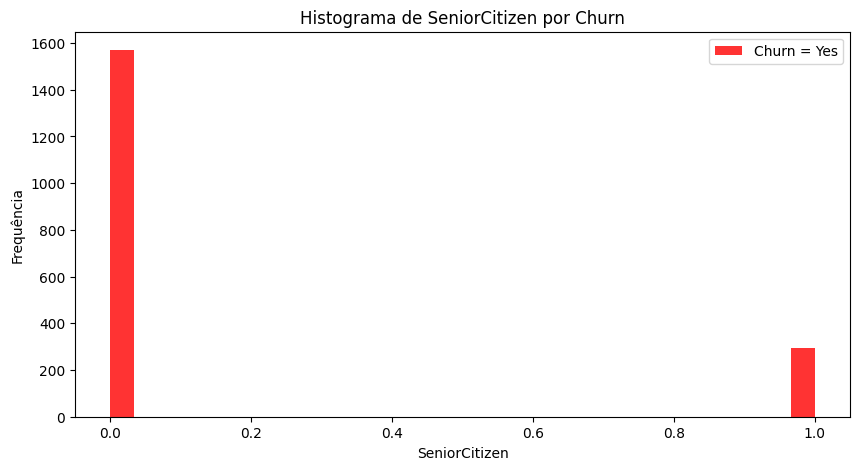

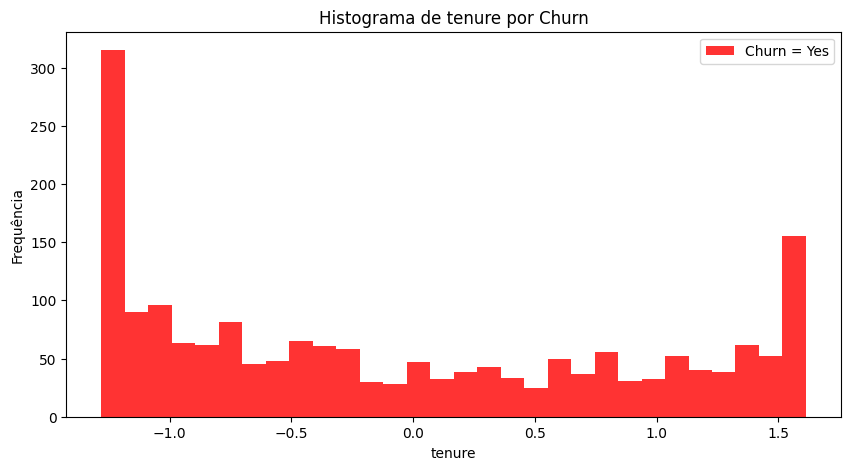

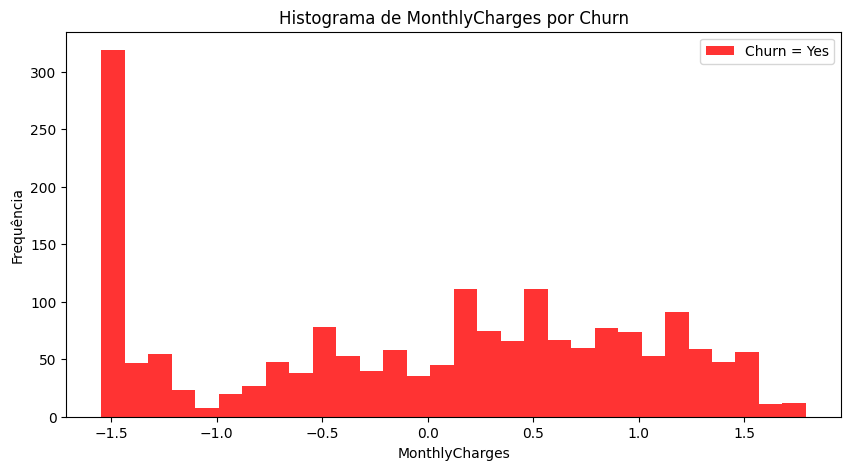

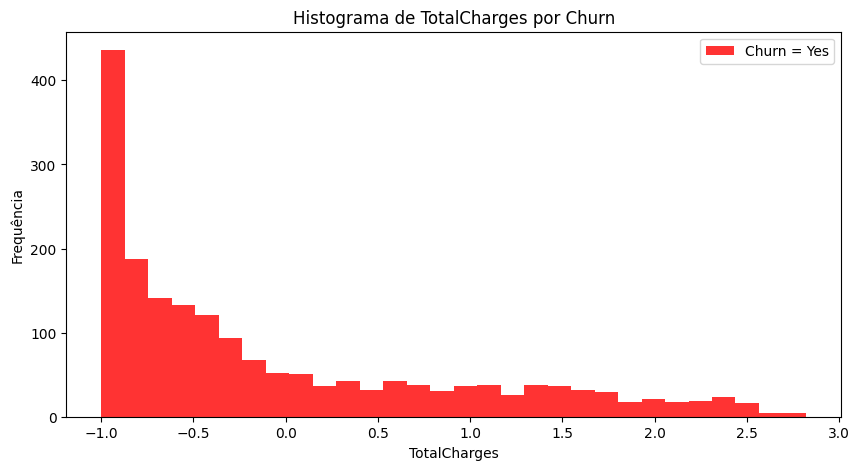

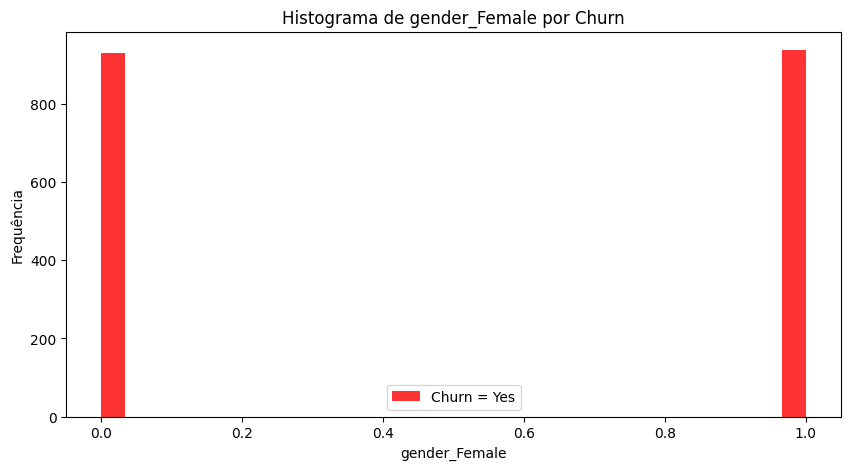

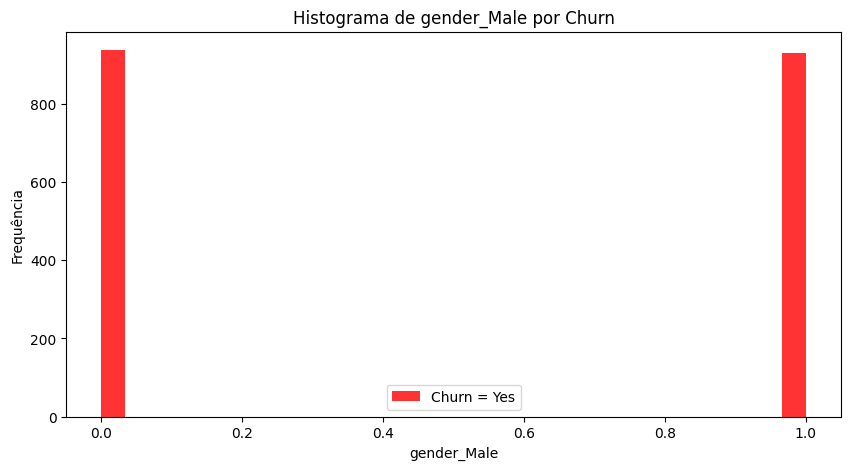

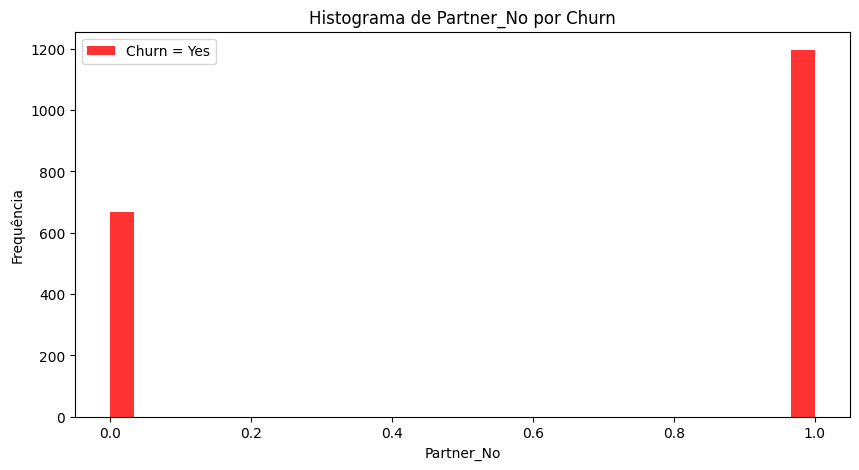

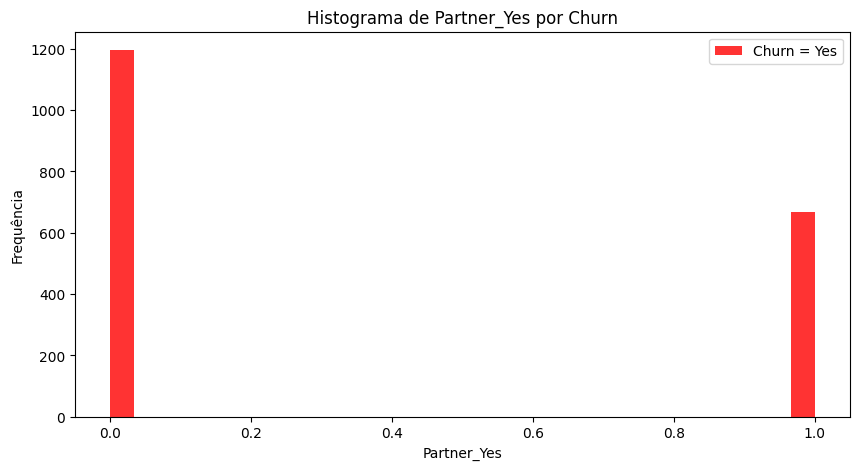

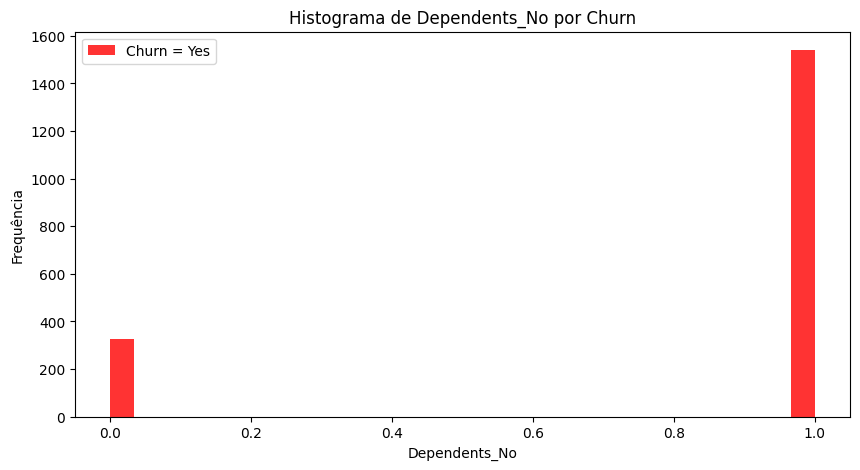

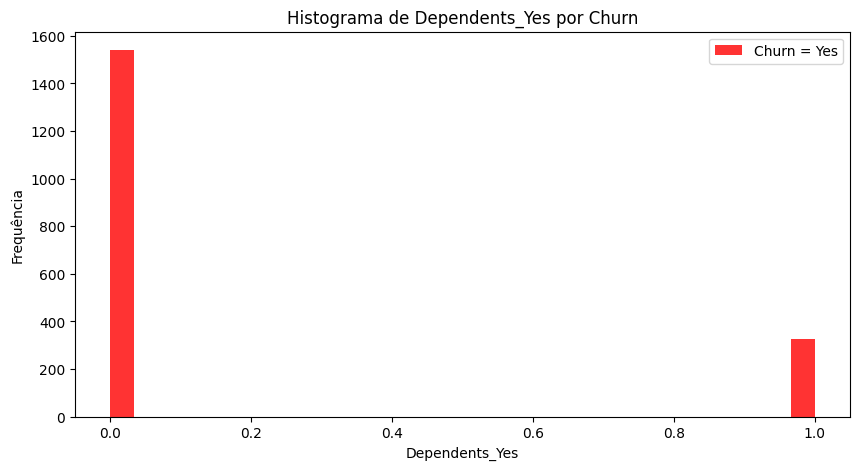

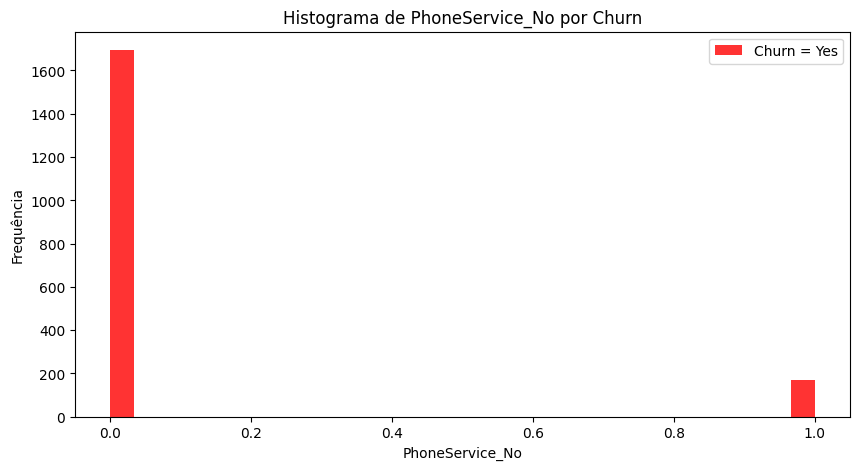

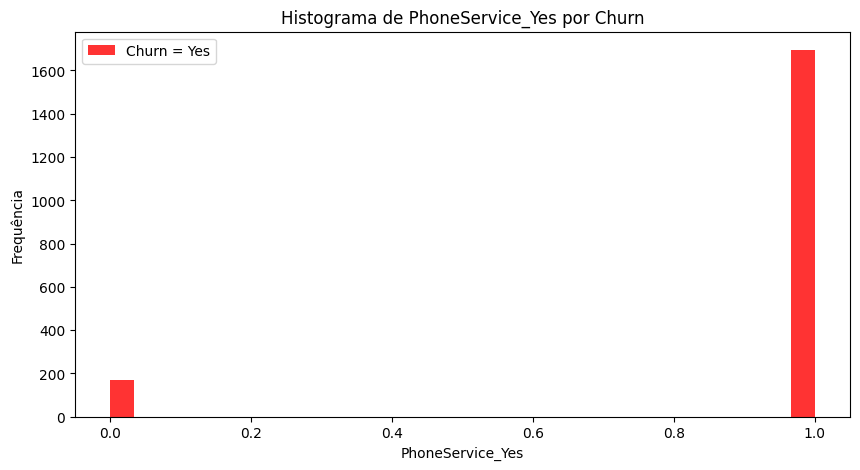

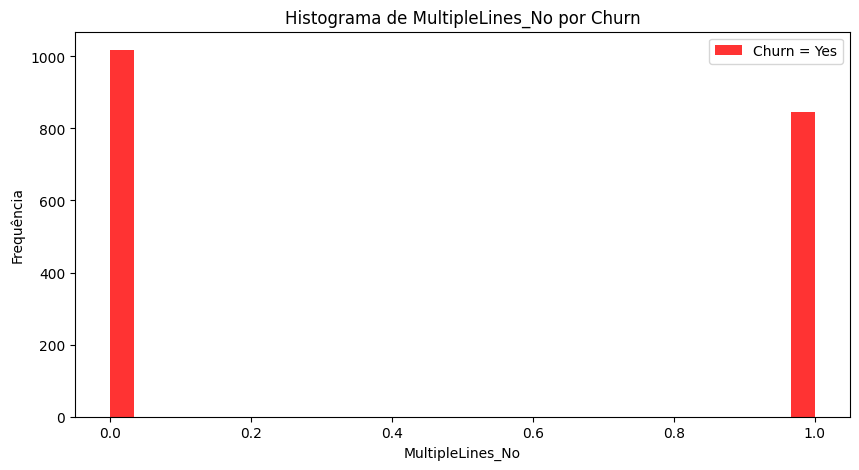

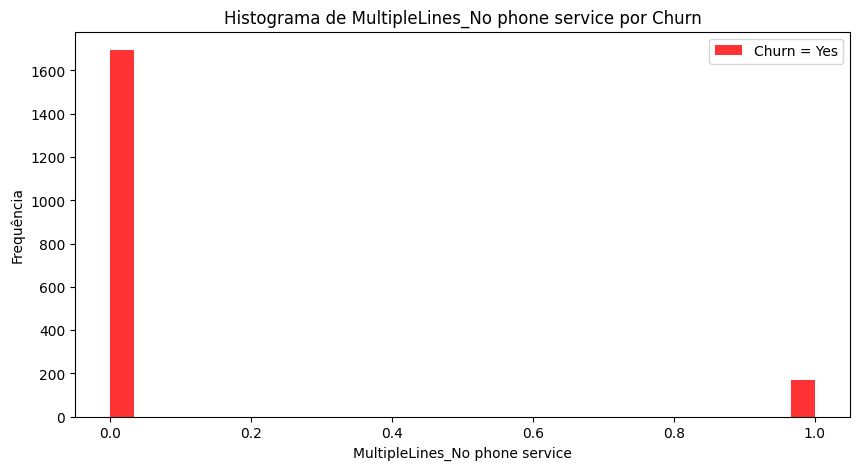

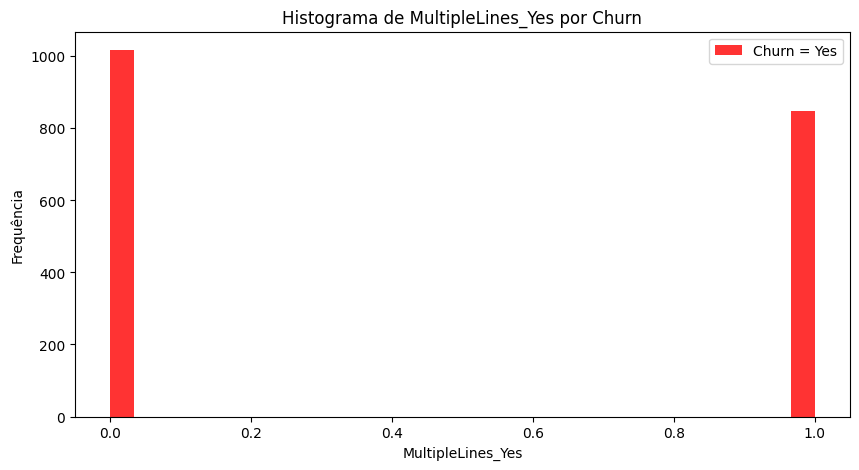

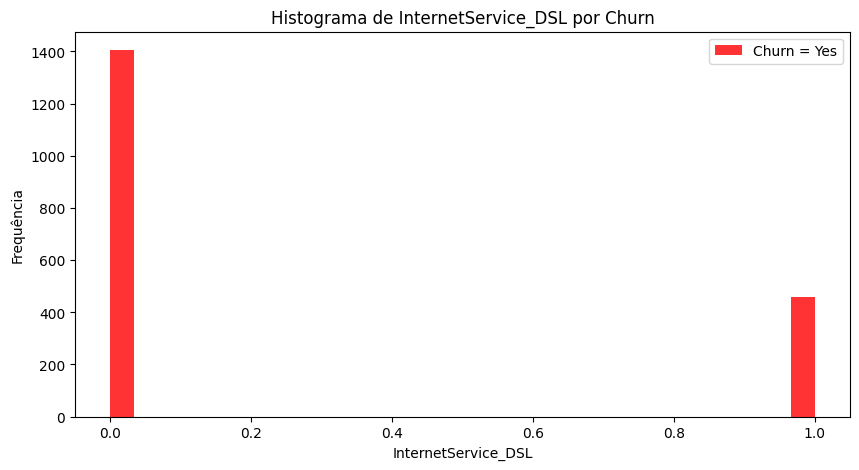

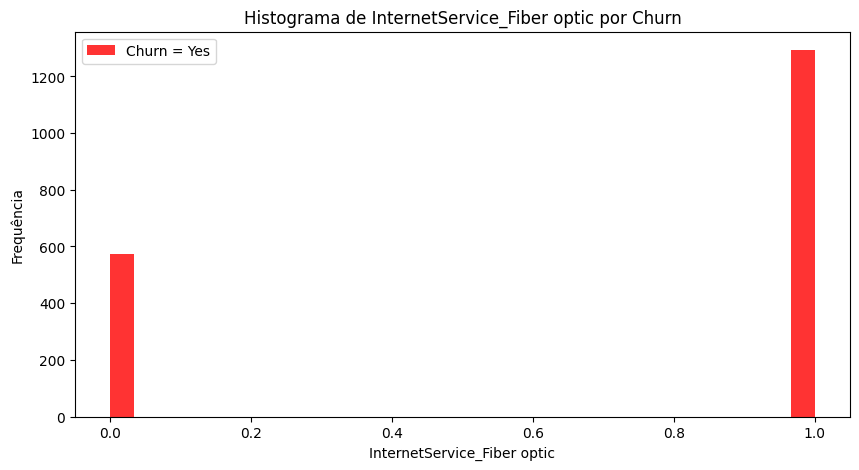

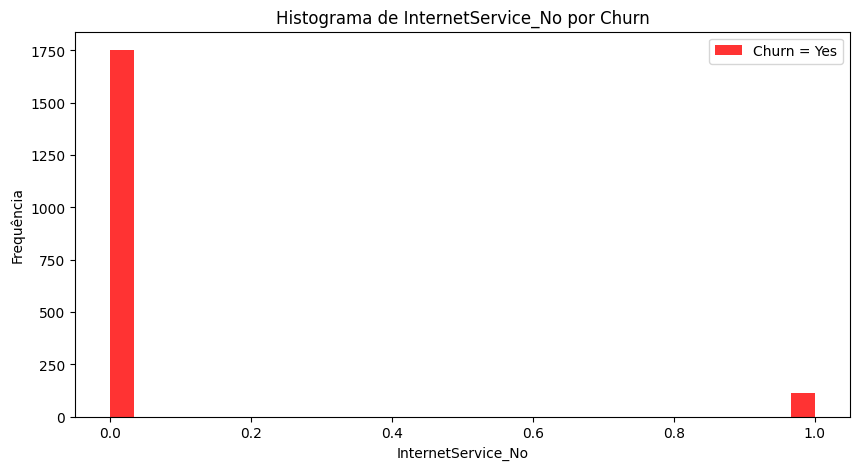

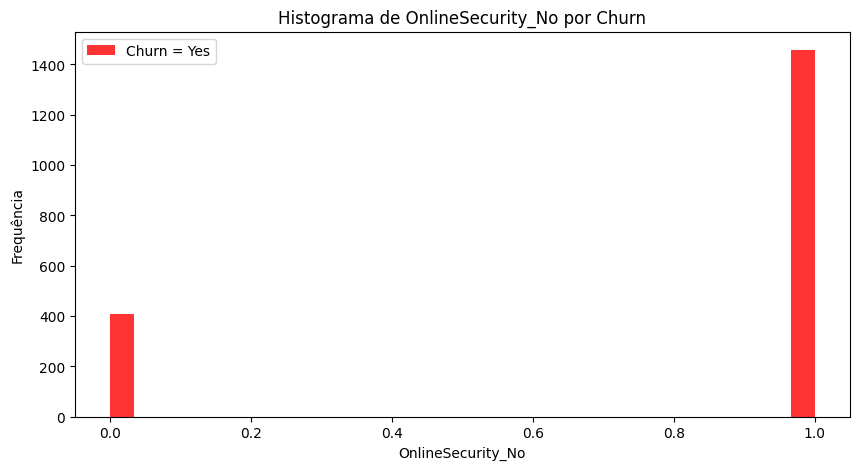

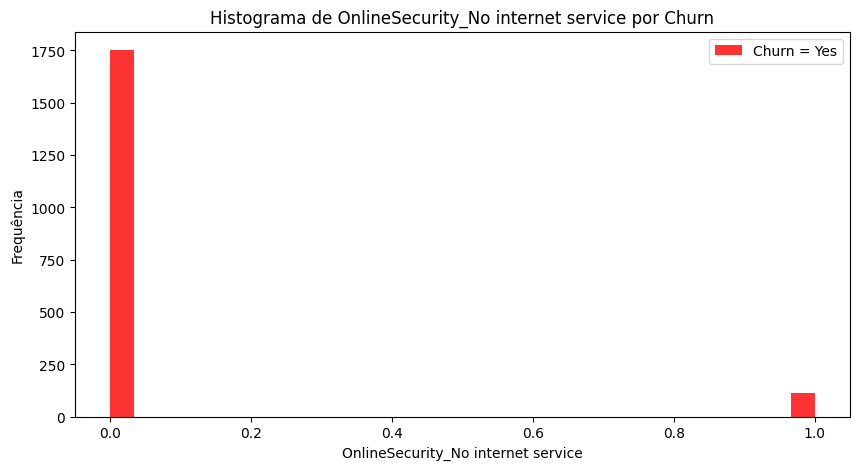

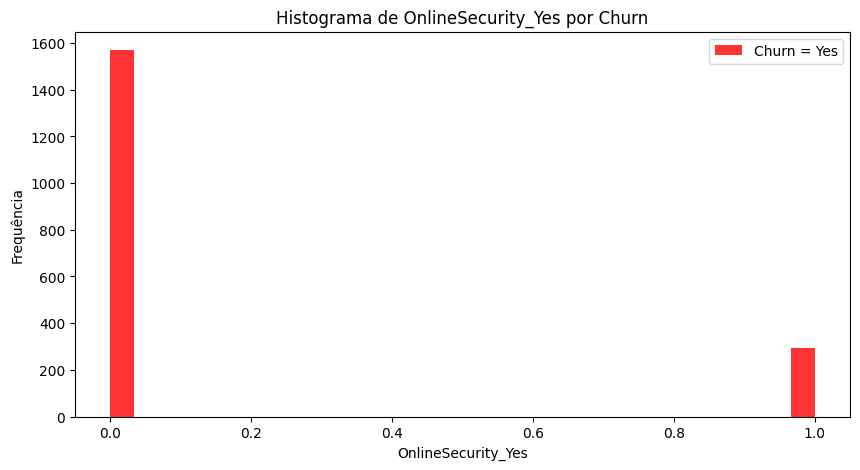

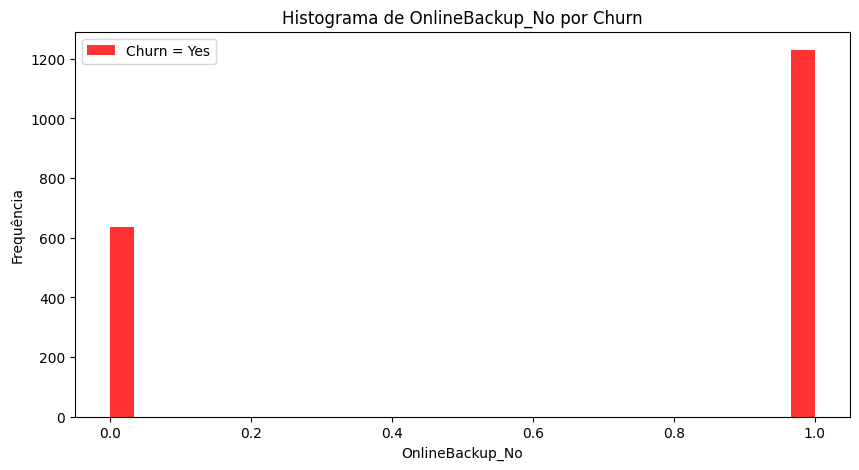

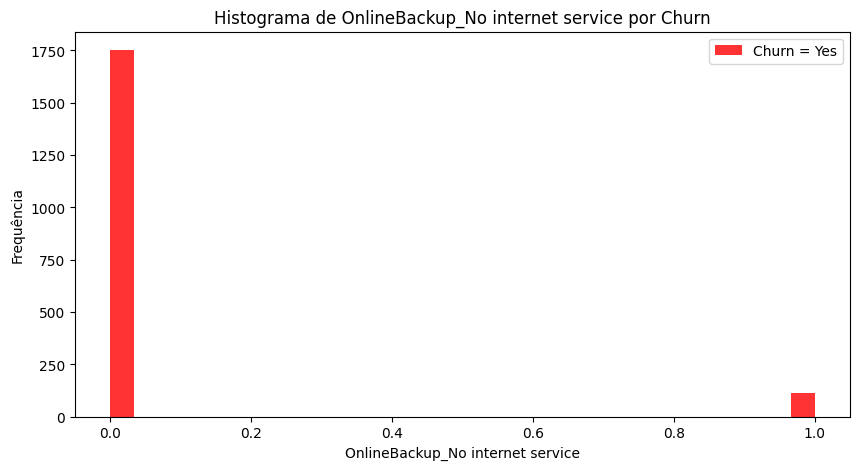

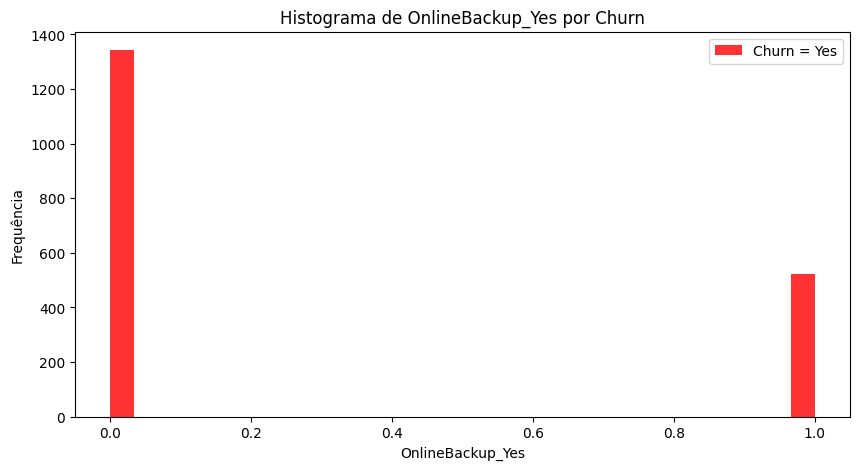

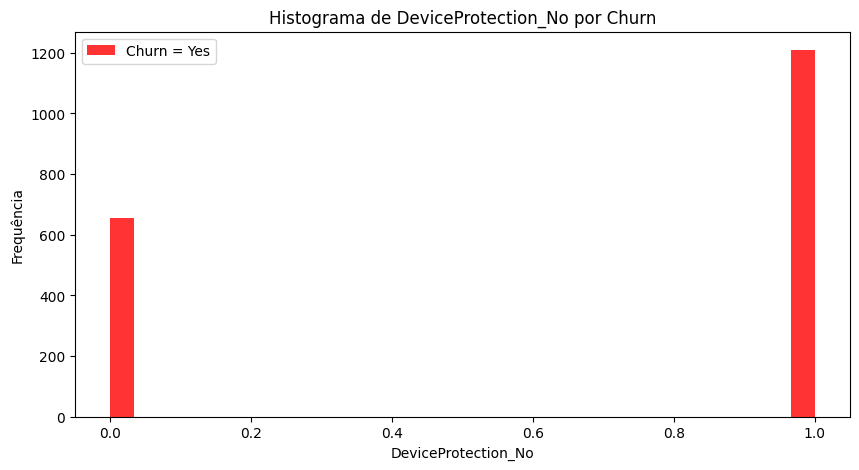

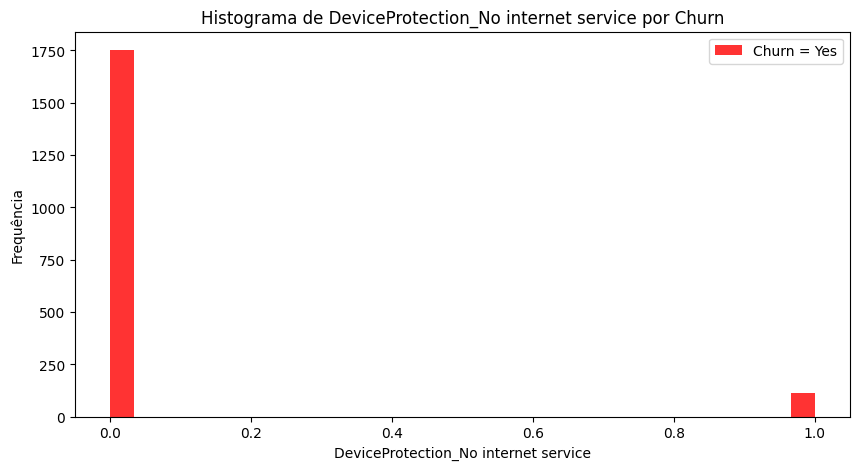

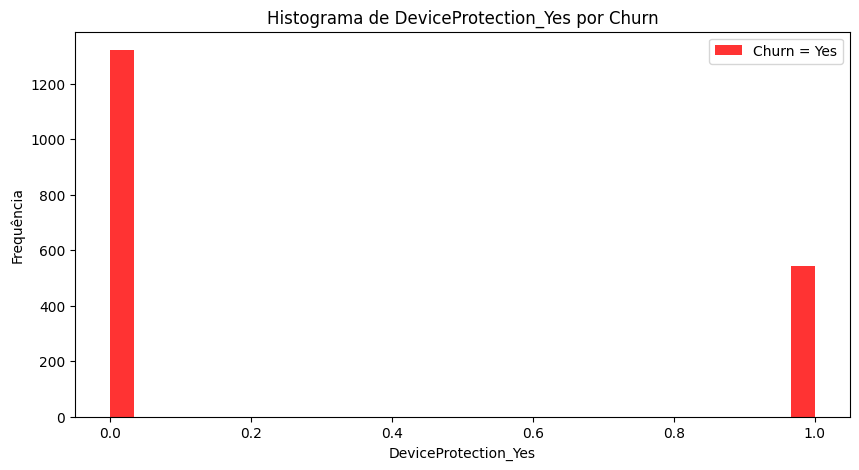

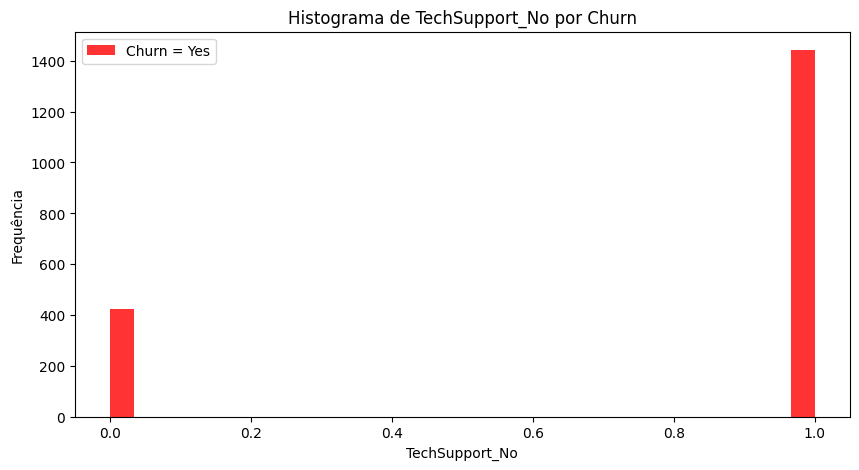

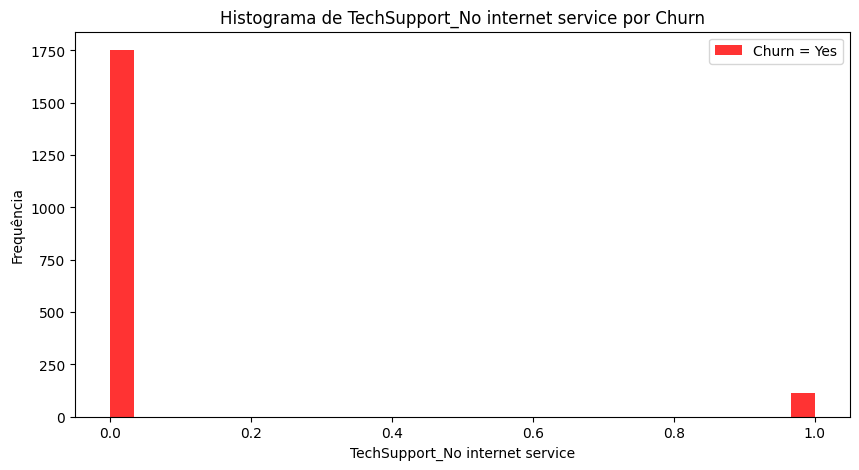

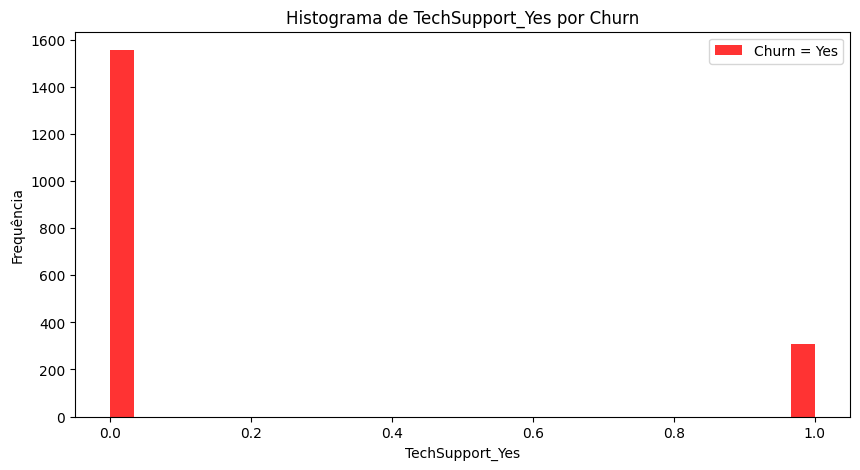

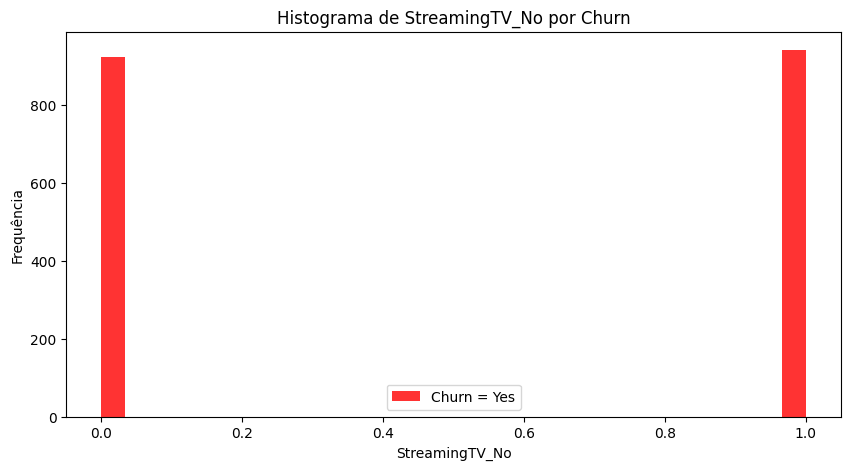

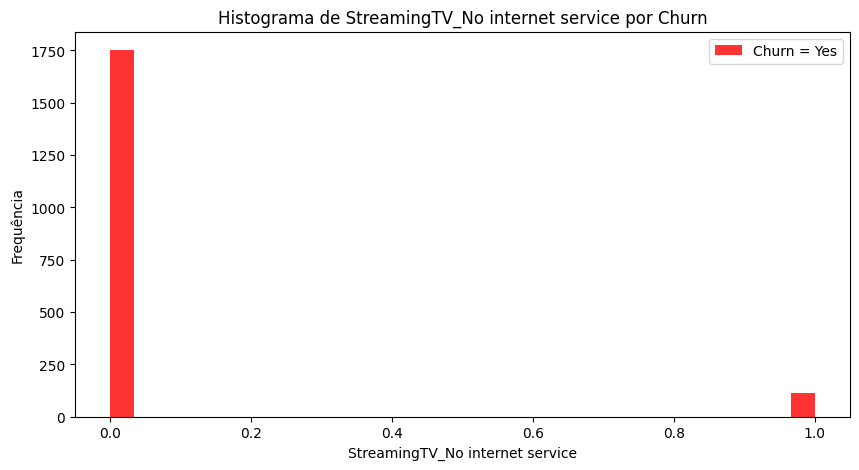

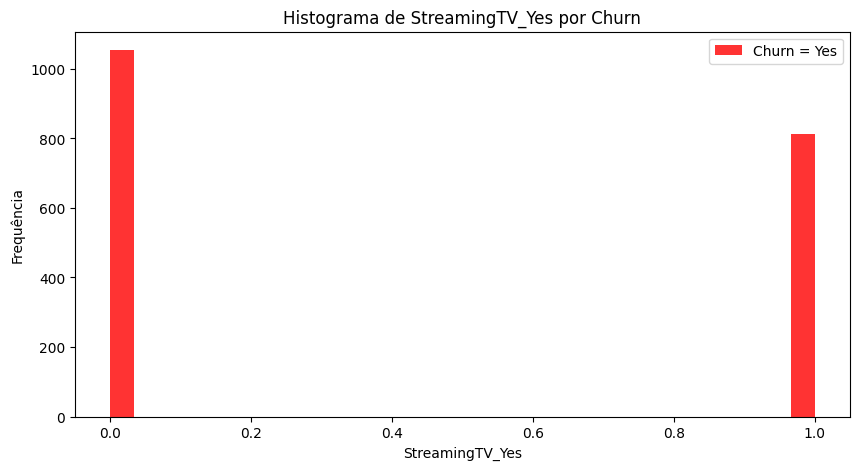

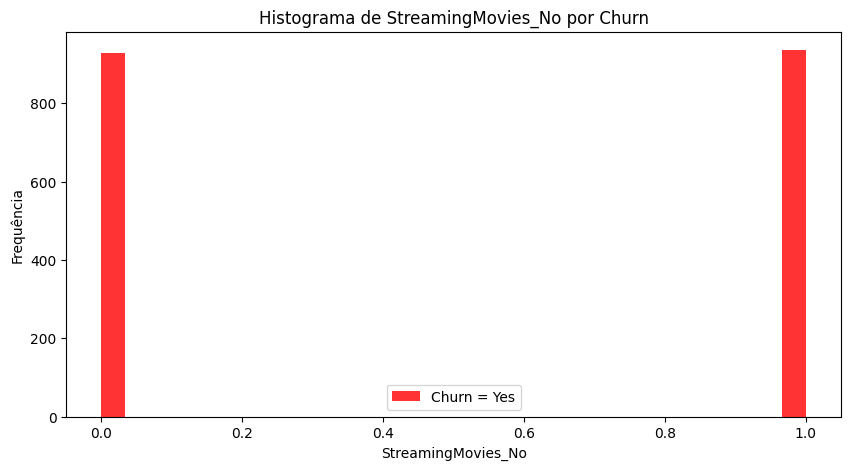

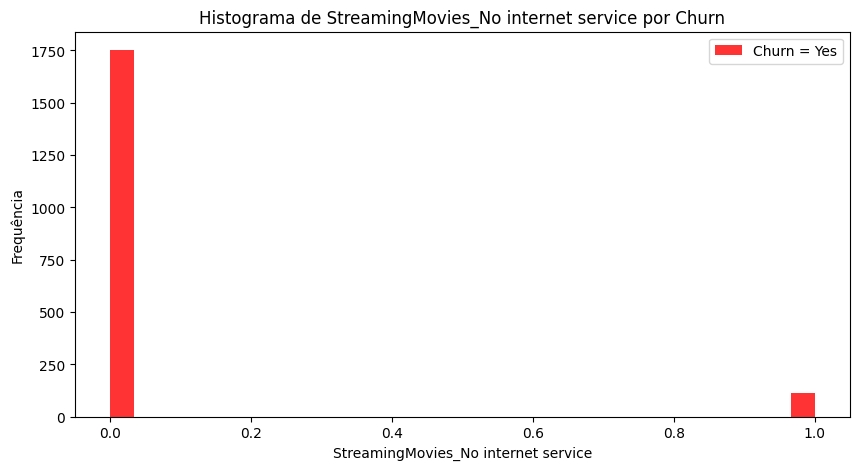

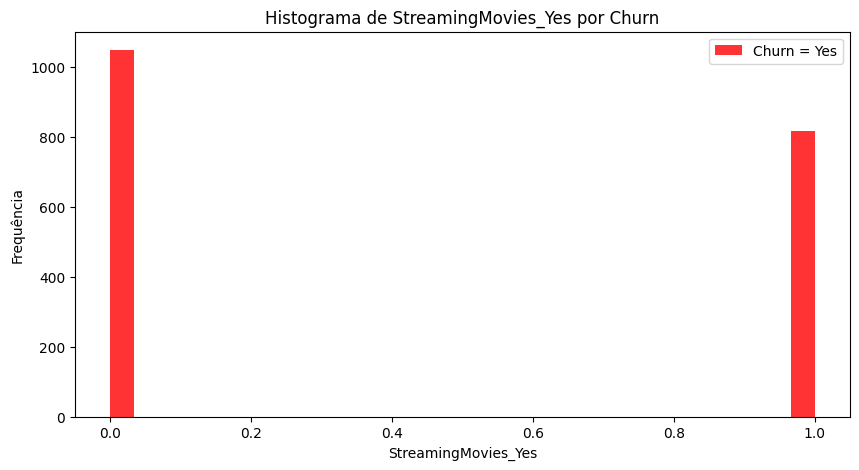

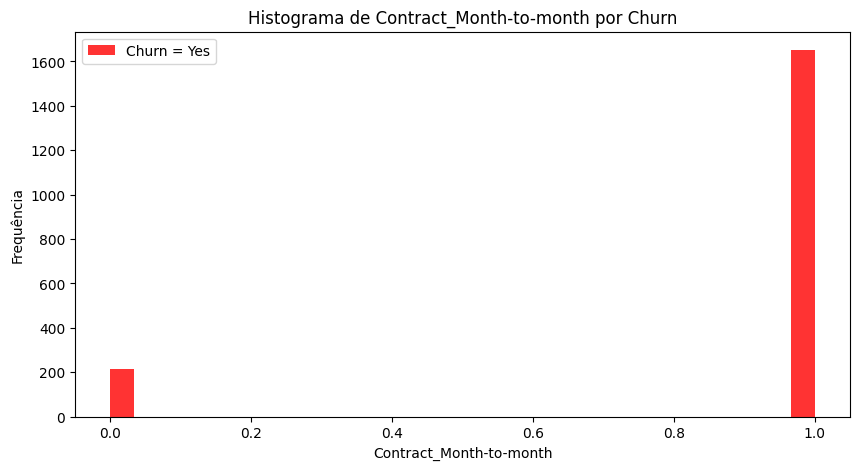

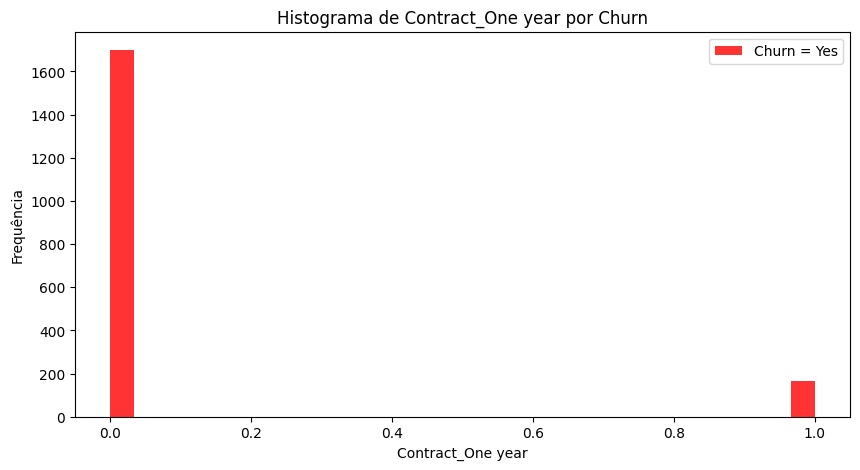

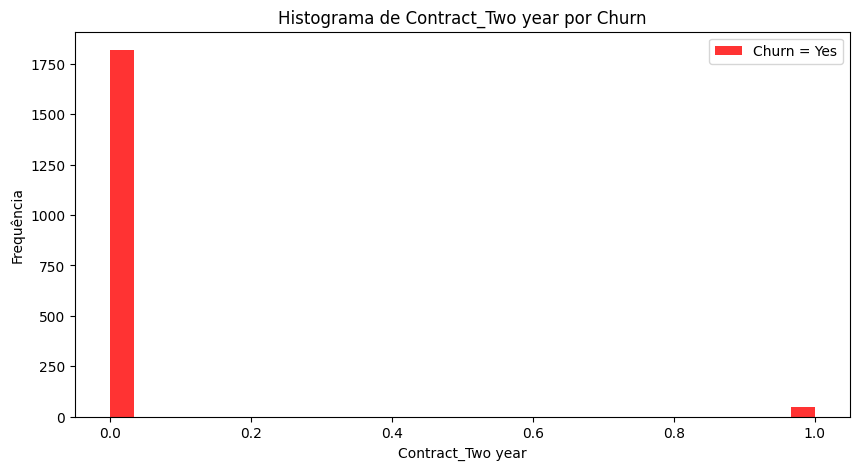

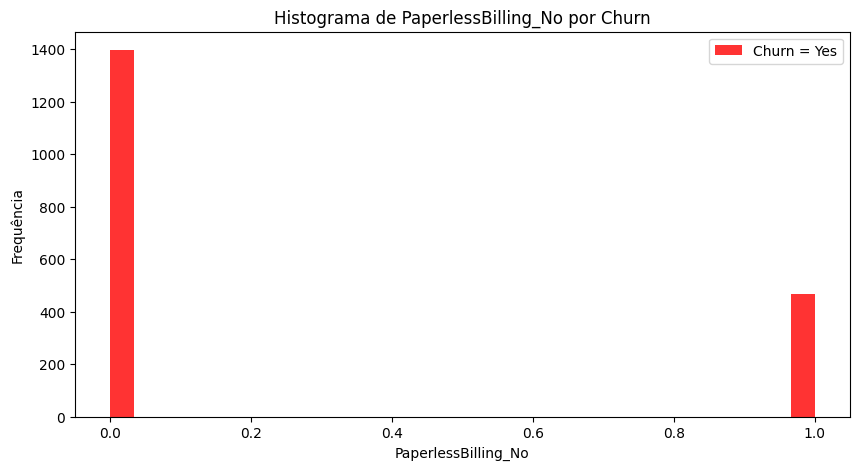

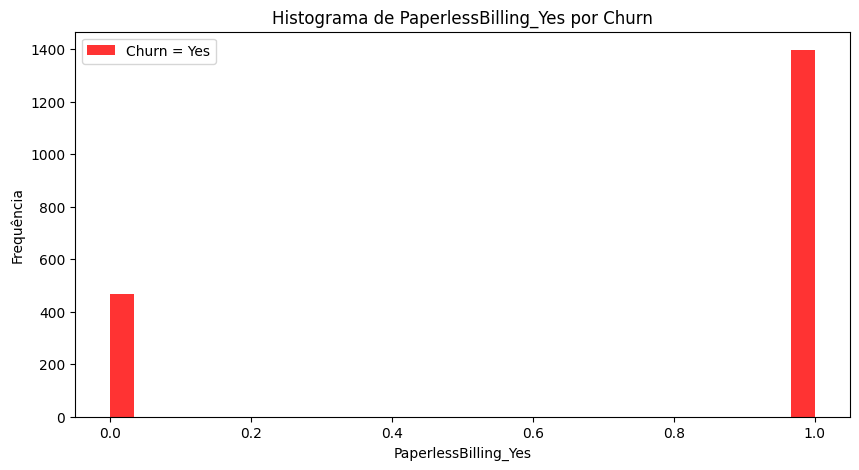

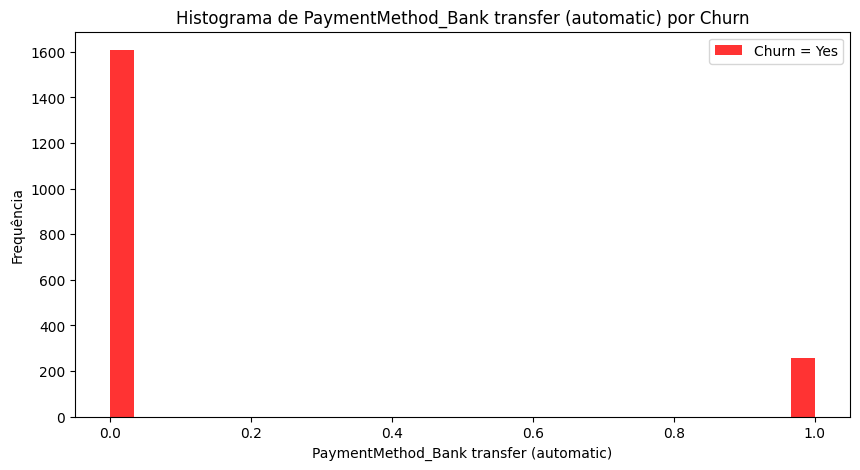

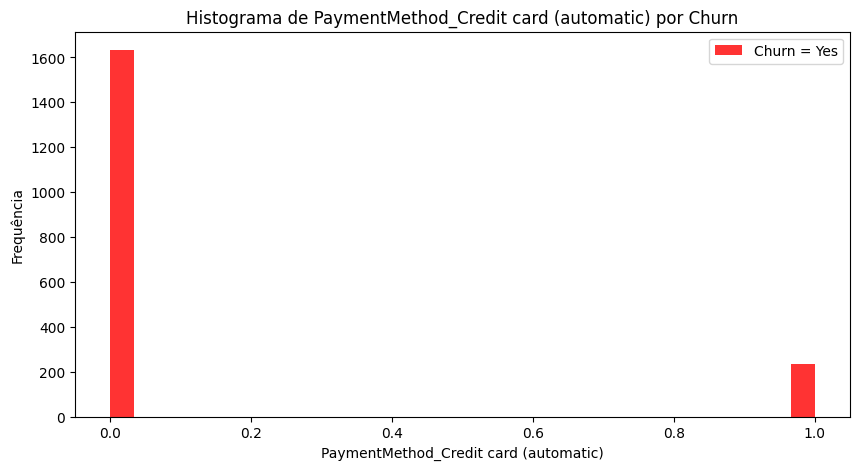

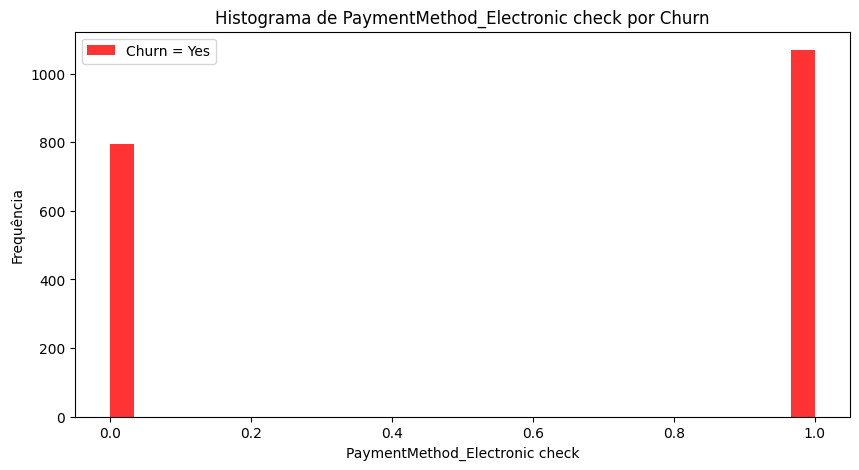

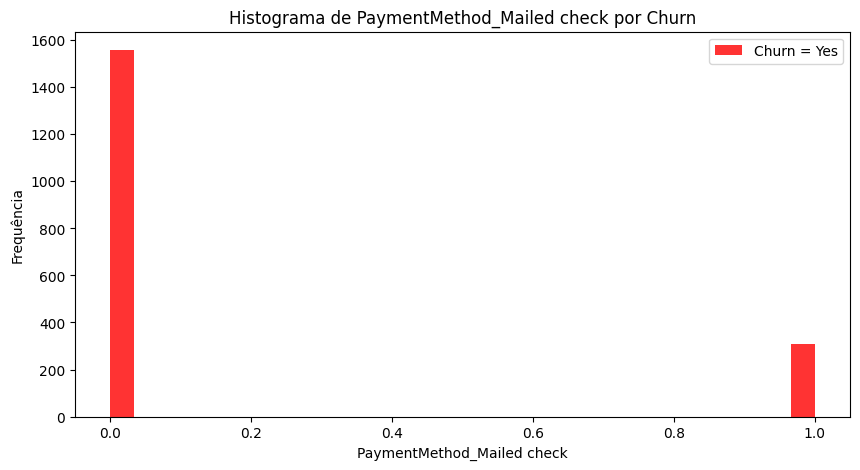

In [12]:
# Análise Exploratória de Dados (AED) - Histograma
colunas_para_plotar = [col for col in dados.columns if col not in ['Churn_Yes', 'Churn_No']]

for coluna in colunas_para_plotar:
    plt.figure(figsize=(10, 5))
    if dados[coluna].dtype in ['float64', 'int64']:
        plt.hist(
            dados[dados['Churn_Yes'] == 1][coluna],
            alpha=0.8, label='Churn = Yes', bins=30, color='red'
        )
        plt.xlabel(coluna)
        plt.ylabel('Frequência')
        plt.title(f'Histograma de {coluna} por Churn')
        plt.legend()
    plt.show()

C:\Users\maykon\AppData\Local\Temp\ipykernel_21488\343904019.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=coluna, data=dados, palette=palette)


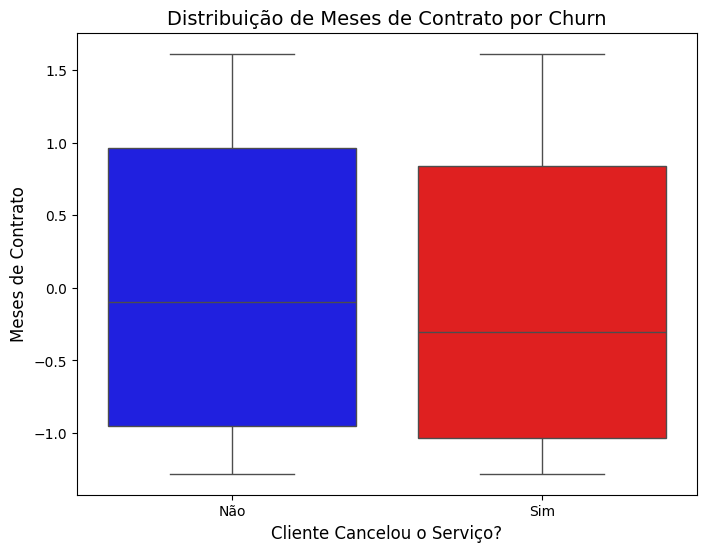

C:\Users\maykon\AppData\Local\Temp\ipykernel_21488\343904019.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=coluna, data=dados, palette=palette)


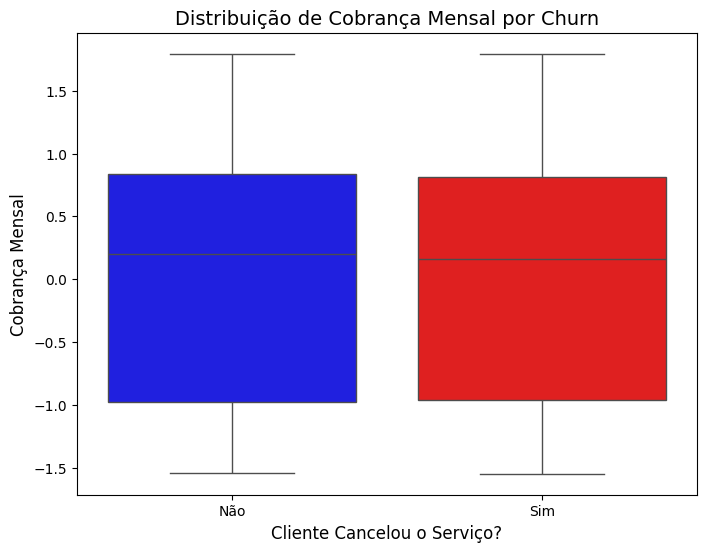

C:\Users\maykon\AppData\Local\Temp\ipykernel_21488\343904019.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y=coluna, data=dados, palette=palette)


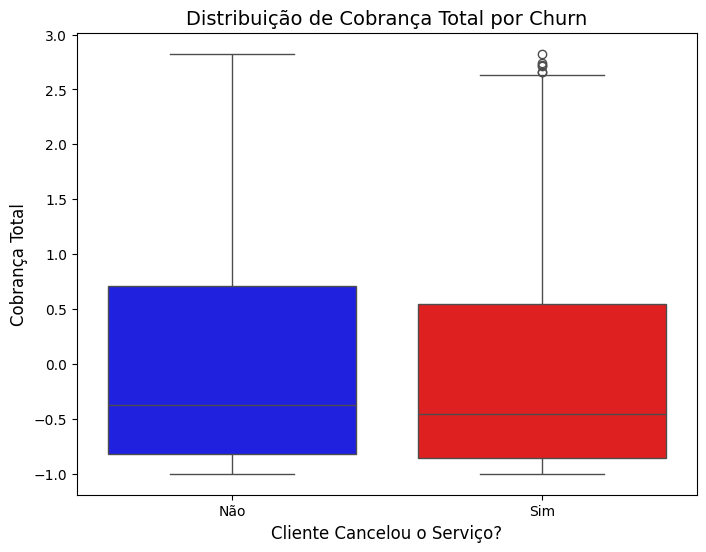

In [68]:
# Análise Exploratória de Dados (AED) - Boxplots 
import seaborn as sns

nomes_traduzidos = {
    'tenure': 'Meses de Contrato',
    'MonthlyCharges': 'Cobrança Mensal',
    'TotalCharges': 'Cobrança Total'
}

colunas_numericas_boxplot = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Adiciona uma coluna 'Churn_Label' para melhorar a legibilidade dos gráficos
dados['Churn_Label'] = dados['Churn_Yes'].map({0: 'Não', 1: 'Sim'})

palette = {'Não': 'blue', 'Sim': 'red'}

for coluna in colunas_numericas_boxplot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn_Label', y=coluna, data=dados, palette=palette)
    
    titulo_grafico = nomes_traduzidos.get(coluna, coluna)
    
    plt.title(f'Distribuição de {titulo_grafico} por Churn', fontsize=14)
    plt.xlabel('Cliente Cancelou o Serviço?', fontsize=12)
    plt.ylabel(titulo_grafico, fontsize=12)
    plt.show()

dados.drop('Churn_Label', axis=1, inplace=True)

Text(0.5, 1.0, 'Matriz de Correlação')

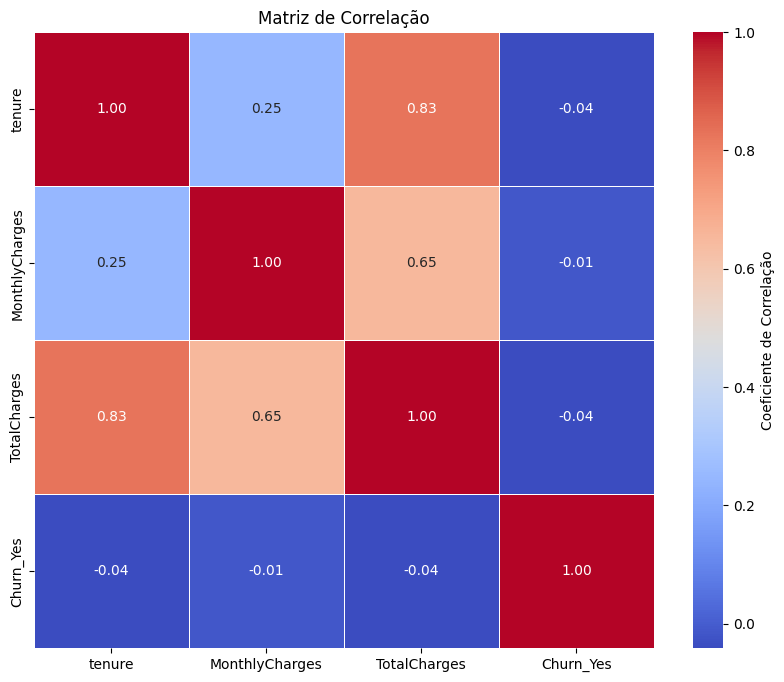

In [69]:
import seaborn as sns

# Seleciona um subconjunto de colunas relevantes para a matriz de correlação
colunas_para_correlacao = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Yes']

correlacao = dados[colunas_para_correlacao].corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlacao,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
plt.title('Matriz de Correlação')

# **Etapa 2: Engenharia de Atributos e Redução de Dimensionalidade**

**1. Criação de Features Derivadas:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Exemplo: tempo de contrato em meses, gastos médios.

**2. Seleção dos Melhores Atributos:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Utilizar `SelectKBest` para identificar as variáveis mais relevantes.

**3. Redução de Dimensionalidade:**  
&nbsp;&nbsp;&nbsp;&nbsp;• Aplicar PCA para visualização em 2D e possível redução do número de variáveis.


In [70]:
#Criação de Features Derivadas

# Quantidade total de serviços contratados
# Define as colunas que representam os serviços contratados
servicos = [
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
    'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
    'PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic'
]

# Soma de serviços de todos os serviços contratados
# Cria uma nova coluna 'Qtd_Servicos_Contratados' que soma os serviços contratados da lista 'servicos'
dados['Qtd_Servicos_Contratados'] = dados[servicos].sum(axis=1)

# Estimativa de gasto total por serviço
dados['GastoPorServico'] = dados['TotalCharges'] / (dados['Qtd_Servicos_Contratados'] + 1)

# Quantidade de serviços de streaming contratados
# Define as colunas que representam os serviços contratados

servicos_Streaming = ['StreamingTV_Yes', 'StreamingMovies_Yes']

# Soma de serviços de todos os serviços de streaming contratados
# Cria uma nova coluna 'Qtd_Streaming_Contratados' que soma os serviços contratados da lista 'servicos'
dados['Qtd_Streaming_Contratados'] = dados[servicos_Streaming].sum(axis=1)

# Quantidade de serviços de segurança contratados
# Define as colunas que representam os serviços contratados
servicos_Seguranca = ['OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes']

# Soma de serviços de todos os serviços de segurança contratados
# Cria uma nova coluna 'Qtd_Seguranca_Contratados' que soma os serviços contratados da lista 'servicos'
dados['Qtd_Seguranca_Contratados'] = dados[servicos_Seguranca].sum(axis=1)

#Pagamento manual (físico)

dados['Pagamento_Manual'] = (
    (dados['PaperlessBilling_No'] == 1) &
    (dados['PaymentMethod_Mailed check'] == 1)
)

#Serviço de Internet Ativo

dados['Serviço_Internet_Ativo'] =(
    (dados['InternetService_DSL'] == 1) |
    (dados['InternetService_Fiber optic'] == 1)
)


# Estimativa de tempo de contrato

def categoria_tempo(tenure):
    if tenure < -0.5:
        return 'Curto'
    elif tenure < 0.5:
        return 'Médio'
    else:
        return 'Longo'

dados['CategoriaTempoContrato'] = dados['tenure'].apply(categoria_tempo)

tempo_encoded = pd.DataFrame(
    encoder.fit_transform(dados[['CategoriaTempoContrato']]).toarray(),
    columns=encoder.get_feature_names_out(['CategoriaTempoContrato'])
)

dados = pd.concat([dados, tempo_encoded], axis=1)
dados.drop(['CategoriaTempoContrato'], axis=1, inplace=True)

# Estimativa de gasto médio mensal
dados['GastoMedioMensal'] = dados.apply(
    lambda x: 0 if x['tenure'] == 0 else x['TotalCharges'] / x['tenure'], axis=1
)

In [39]:
dados.isna().sum()  # verifica se há valores nulos após as transformações

SeniorCitizen                              11
tenure                                     11
MonthlyCharges                             11
TotalCharges                               11
gender_Female                              11
gender_Male                                11
Partner_No                                 11
Partner_Yes                                11
Dependents_No                              11
Dependents_Yes                             11
PhoneService_No                            11
PhoneService_Yes                           11
MultipleLines_No                           11
MultipleLines_No phone service             11
MultipleLines_Yes                          11
InternetService_DSL                        11
InternetService_Fiber optic                11
InternetService_No                         11
OnlineSecurity_No                          11
OnlineSecurity_No internet service         11
OnlineSecurity_Yes                         11
OnlineBackup_No                   

In [71]:
dados.dropna(inplace=True)  # remove linhas com valores nulos
dados.isna().sum()  # verifica se há valores nulos após as transformações

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBack

                                Feature        Score
0               Contract_Month-to-month  1372.297120
1                     OnlineSecurity_No   929.957563
2                        TechSupport_No   897.259948
3          CategoriaTempoContrato_Curto   803.772849
4           InternetService_Fiber optic   727.814268
5                     Contract_Two year   703.731136
6        PaymentMethod_Electronic check   702.962823
7          CategoriaTempoContrato_Longo   585.553220
8                       OnlineBackup_No   542.404411
9                   DeviceProtection_No   475.917043
10  StreamingMovies_No internet service   381.675775


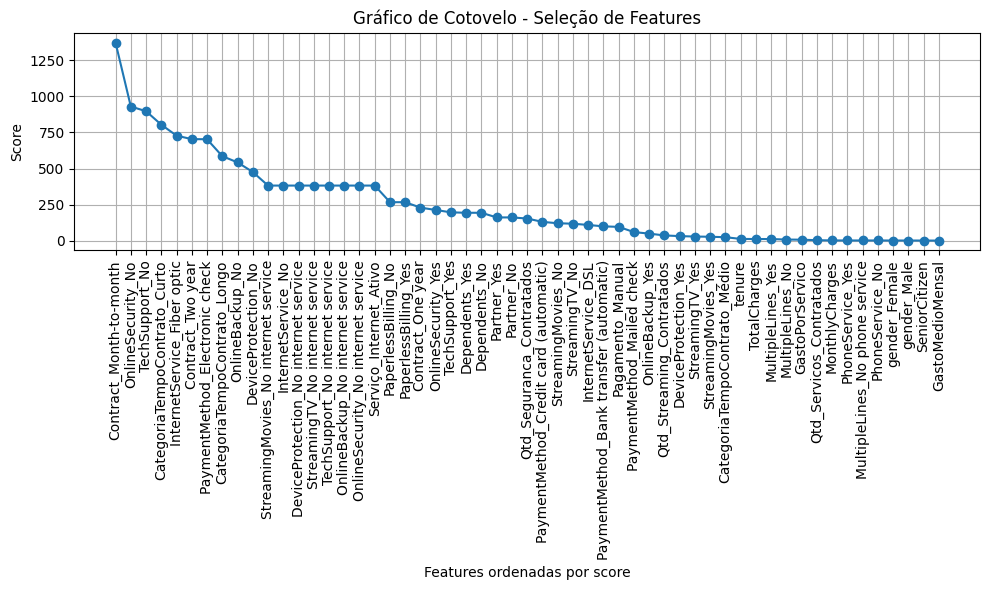

In [73]:
#importação de bibliotecas para seleção e separação de features
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Separando somente as features
F = dados.drop(['Churn_Yes', 'Churn_No'], axis=1)

# Separando somente o target
t = dados['Churn_Yes']

# Definindo o valor de nFeatures (número de features a serem selecionados) entre 4 (Modelos simples: Árvore de decisão) e 11 (Modelos complexos: Perceptron multicamadas)
nFeatures =  11

# Criando o seletor
selector = SelectKBest(score_func=f_classif, k=nFeatures)

# Ajustando o seletor aos dados
F_new = selector.fit_transform(F, t)

# Visualiaza os scores das features
scores = selector.scores_
selected_indices = selector.get_support(indices=True)
selected_features = F.columns[selected_indices]

# Criando DataFrame com todas as features e scores
feature_scores_df = pd.DataFrame({
    'Feature': F.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False).reset_index(drop=True)

# Mostrando o top nFeatures features com maior score
print(feature_scores_df.head(nFeatures))

import matplotlib.pyplot as plt
import numpy as np

# Cria DataFrame para exibir os scores de todas as features
feature_scores_df = pd.DataFrame({
    'Feature': F.columns,
    'Score': scores
}).sort_values(by='Score', ascending=False).reset_index(drop=True)

# Gráfico de cotovelo para comprovação do valor de nFeatures
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_scores_df) + 1), feature_scores_df['Score'], marker='o', linestyle='-')
plt.xticks(ticks=np.arange(1, len(feature_scores_df) + 1), labels=feature_scores_df['Feature'], rotation=90)
plt.xlabel('Features ordenadas por score')
plt.ylabel('Score')
plt.title('Gráfico de Cotovelo - Seleção de Features')
plt.grid(True)
plt.tight_layout()
plt.show()


F_best = F[selected_features]



[[ 0.24393918  0.34986743  0.30709196  0.31949126  0.36040966 -0.23959192
   0.38333664 -0.28833436  0.24922294  0.26259503 -0.27065661]
 [-0.41840285 -0.21224868 -0.08365037 -0.06861588 -0.20165307  0.36606409
   0.26703424 -0.1840974  -0.12239336  0.49070653 -0.48222918]]
0.5589490094084445


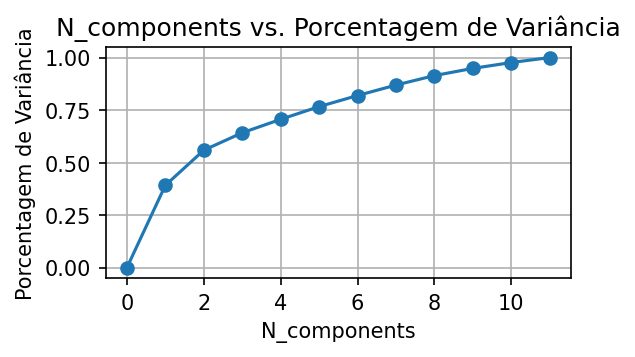

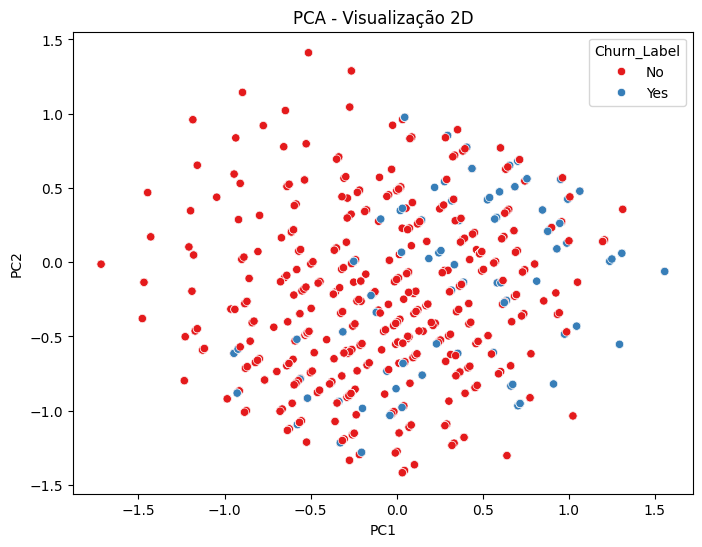

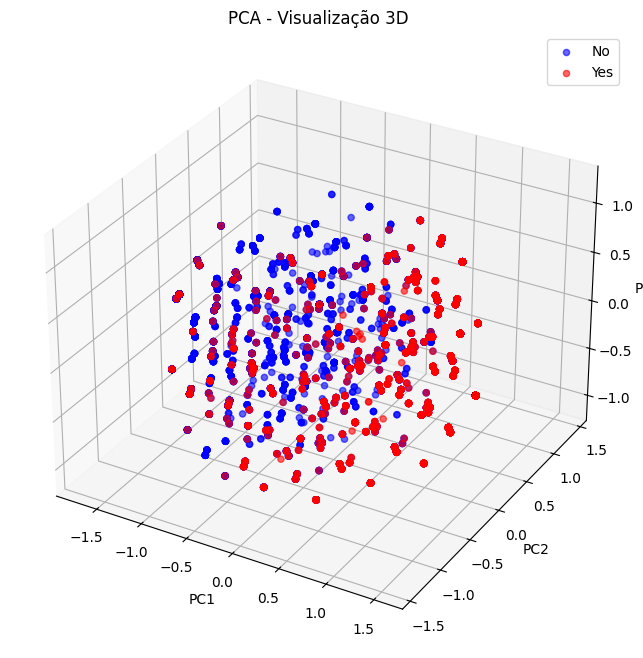

In [74]:
# Aplicando PCA para visualização 2D

# Importando a biblioteca PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# para 2 componentes principais (Features e target)
pca = PCA(n_components=2)

# Ajustando e transformando os dados
F_pca = pca.fit_transform(F_best)

print(pca.components_)
print(sum(pca.explained_variance_ratio_)) #2 componentes principais explicam 55% da variância total

import numpy as np
nums = np.arange(12) # número de componentes principais a serem testados + 1

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(F_best)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('N_components')
plt.ylabel('Porcentagem de Variância')
plt.title('N_components vs. Porcentagem de Variância')

# Criando uma instância do PCA para reduzir a dimensionalidade

import pandas as pd
# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=F_pca, columns=['PC1', 'PC2'])

# Adicionando a coluna de target ao DataFrame
pca_df['Churn_Yes'] = t.values

#importando seaborn para visualização
import seaborn as sns

# Visualizando os dados em 2D com seaborn
plt.figure(figsize=(8,6))
pca_df['Churn_Label'] = pca_df['Churn_Yes'].map({0: 'No', 1: 'Yes'})
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Churn_Label', palette='Set1')
plt.title('PCA - Visualização 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# PCA para 3 componentes
pca_3d = PCA(n_components=3)
F_pca_3d = pca_3d.fit_transform(F_best)

# Criar novo DataFrame para visualização 3D
pca_df_3d = pd.DataFrame(data=F_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Churn_Yes'] = t.values
pca_df_3d['Churn_Label'] = pca_df_3d['Churn_Yes'].map({0: 'No', 1: 'Yes'})

# Visualização em 3D com matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = {'No': 'blue', 'Yes': 'red'}

for label in pca_df_3d['Churn_Label'].unique():
    subset = pca_df_3d[pca_df_3d['Churn_Label'] == label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               label=label, c=colors[label], alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Visualização 3D')
ax.legend()
plt.show()



# **Etapa 3: Modelos de Classificação**

**1. Divisão dos Dados:**  
Dividir o conjunto em treino e teste (exemplo: 80% treino / 20% teste).

**2. Treinamento de Modelos:**  
Treinar três modelos de classificação:
- **Árvore de Decisão** (`DecisionTreeClassifier`)
- **Máquina de Vetores de Suporte** (`SVC`)
- **Perceptron Multicamadas** (`MLPClassifier`)

**3. Ajuste de Hiperparâmetros:**  
Utilizar `GridSearchCV` para encontrar os melhores hiperparâmetros de cada modelo.

**4. Avaliação de Desempenho:**  
Avaliar os modelos utilizando:
- Matriz de Confusão
- Precision, Recall, F1-Score
- ROC-AUC


> Separação dos dados em treino e teste

> **X** sendo os atributos e **Y** a classificação correta

In [75]:
from sklearn.model_selection import train_test_split

# features (x) e classe alvo (y)
x = F_best 
y = dados['Churn_Yes'] #classe correta

# separação de conjuntos de atributos e classe correta para treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

print("formato x_treino:", x_treino.shape)
print("formato  X_teste:", x_teste.shape)
print("formato  y_train:", y_treino.shape)
print("formato  y_teste:", y_teste.shape)

formato x_treino: (5608, 11)
formato  X_teste: (1402, 11)
formato  y_train: (5608,)
formato  y_teste: (1402,)




> Treinando modelo ***DecisionTreeClassifier***



In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Usa somente as melhores features selecionadas pelo SelectKBest
x = F_best
y = dados['Churn_Yes']

# Separação em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(x_treino, y_treino)

# Avaliação de acurácia
acuracia = modelo_arvore.score(x_teste, y_teste)
print(f"Acurácia DTC: {acuracia}")


Acurácia DTC: 0.782453637660485




> Treinando modelo ***SVC***



In [77]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Usa somente as melhores features selecionadas pelo SelectKBest
x = F_best
y = dados['Churn_Yes']

# Separação em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo SVC
modelo_svc = SVC(random_state=42)
modelo_svc.fit(x_treino, y_treino)

# Avaliação de acurácia
acuracia_svc = modelo_svc.score(x_teste, y_teste)
print(f"Acurácia SVC: {acuracia_svc}")


Acurácia SVC: 0.7867332382310984




> Treinando modelo ***Perceptron*** (MLPClassifier)



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Usa somente as melhores features selecionadas pelo SelectKBest
x = F_best
y = dados['Churn_Yes']

# Separação em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

# Criação e treinamento do modelo Perceptron Multicamadas
modelo_perceptron = MLPClassifier(random_state=42, max_iter=1000)
modelo_perceptron.fit(x_treino, y_treino)

# Avaliação de acurácia
acuracia_perceptron = modelo_perceptron.score(x_teste, y_teste)
print(f"Acurácia Perceptron: {acuracia_perceptron}")


Acurácia Perceptron: 0.8017118402282454




> Melhores parâmetros para DTC utilizando GridSearchCV



In [79]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV para DecisionTreeClassifier
#grid para a busca
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_treino, y_treino)

print("Melhores parâmetros para Decision Tree:", grid_search_dt.best_params_)
print("Melhor acurácia para Decision Tree:", grid_search_dt.best_score_)

Melhores parâmetros para Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Melhor acurácia para Decision Tree: 0.7874462736193334




> Melhores parâmetros para SVC utilizando GridSearchCV



In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Pipeline: escalonamento + modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 'auto', 0.1],
    'svc__kernel': ['rbf', 'linear']
}

grid_search_svc = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Treinando
grid_search_svc.fit(x_treino, y_treino)

# Resultados
print("Melhores parâmetros:", grid_search_svc.best_params_)
print("Melhor acurácia média (CV):", grid_search_svc.best_score_)


Melhores parâmetros: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Melhor acurácia média (CV): 0.7820961358349194




> Melhores parâmetros para MLP utilizando GridSearchCV



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
}

grid_search_mlp = GridSearchCV(
    MLPClassifier(random_state=42, max_iter=1000),
    param_grid_mlp,
    cv=5,
    scoring='accuracy',
)

grid_search_mlp.fit(x_treino, y_treino)

print("\nMelhores parâmetros para MLPClassifier:", grid_search_mlp.best_params_)
print("Melhor acurácia para MLPClassifier:", grid_search_mlp.best_score_)



Melhores parâmetros para MLPClassifier: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Melhor acurácia para MLPClassifier: 0.7820961358349194


Avaliação DTC

--- Avaliação da Árvore de Decisão ---
Matriz de Confusão:


c:\Users\maykon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


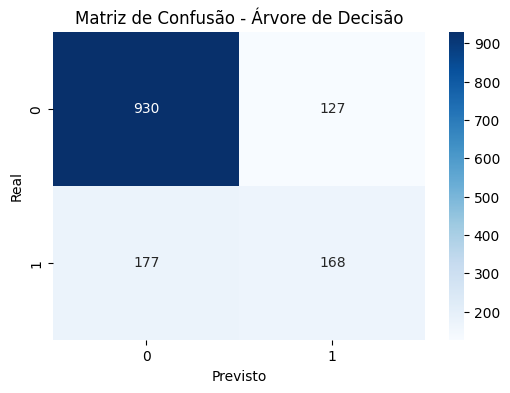


Métricas:
Precisão: 0.5695
Revocação (Recall): 0.4870
F1-Score: 0.5250
ROC-AUC: 0.6834


c:\Users\maykon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


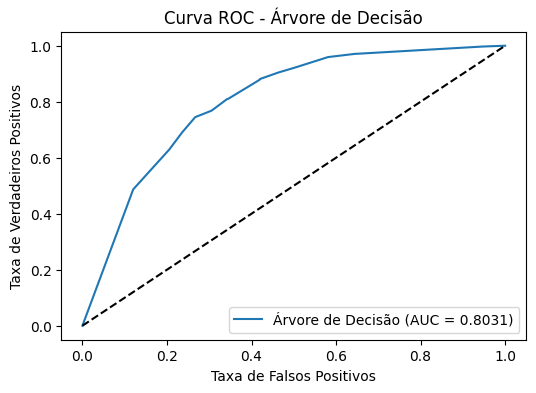

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Avaliação da Árvore de Decisão ---")
y_pred_dt = grid_search_dt.best_estimator_.predict(x_teste)

print("Matriz de Confusão:")
cm_dt = confusion_matrix(y_teste, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\nMétricas:")
print(f"Precisão: {precision_score(y_teste, y_pred_dt):.4f}")
print(f"Revocação (Recall): {recall_score(y_teste, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_teste, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_teste, y_pred_dt):.4f}")

# Curva ROC (se possível)
if hasattr(grid_search_dt.best_estimator_, "predict_proba"):
    y_prob_dt = grid_search_dt.best_estimator_.predict_proba(x_teste)[:, 1]
    fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_teste, y_prob_dt)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_dt, tpr_dt, label=f'Árvore de Decisão (AUC = {roc_auc_score(y_teste, y_prob_dt):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - Árvore de Decisão')
    plt.legend()
    plt.show()


Avaliação SVC

--- Avaliação do SVC ---


c:\Users\maykon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Matriz de Confusão:


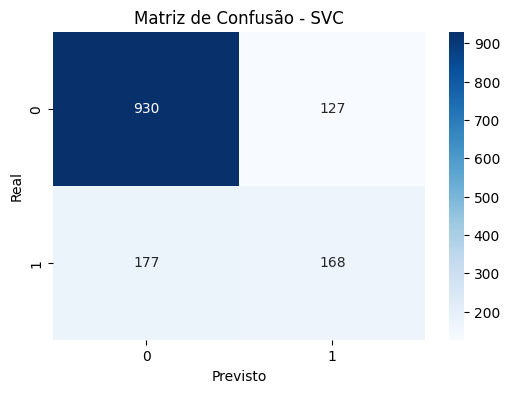


Métricas:
Precisão: 0.5695
Revocação (Recall): 0.4870
F1-Score: 0.5250
ROC-AUC: 0.6834


In [51]:
print("--- Avaliação do SVC ---")
y_pred_svc = grid_search_svc.best_estimator_.predict(x_teste)

print("Matriz de Confusão:")
cm_svc = confusion_matrix(y_teste, y_pred_svc)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - SVC')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\nMétricas:")
print(f"Precisão: {precision_score(y_teste, y_pred_svc):.4f}")
print(f"Revocação (Recall): {recall_score(y_teste, y_pred_svc):.4f}")
print(f"F1-Score: {f1_score(y_teste, y_pred_svc):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_teste, y_pred_svc):.4f}")

# Curva ROC se aplicável
if hasattr(grid_search_svc.best_estimator_, "predict_proba"):
    y_prob_svc = grid_search_svc.best_estimator_.predict_proba(x_teste)[:, 1]
    fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_teste, y_prob_svc)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {roc_auc_score(y_teste, y_prob_svc):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - SVC')
    plt.legend()
    plt.show()

Avaliação MLP

--- Avaliação do MLP ---
Matriz de Confusão:


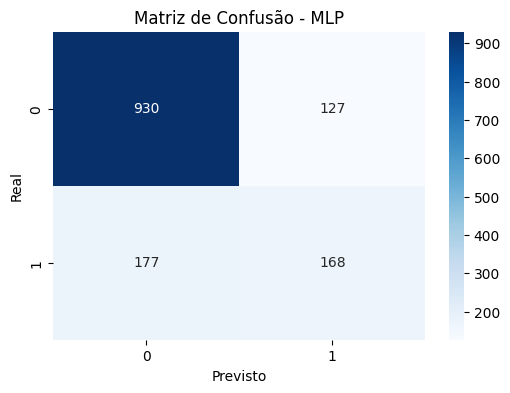


Métricas:
Precisão: 0.5695
Revocação (Recall): 0.4870
F1-Score: 0.5250
ROC-AUC: 0.6834


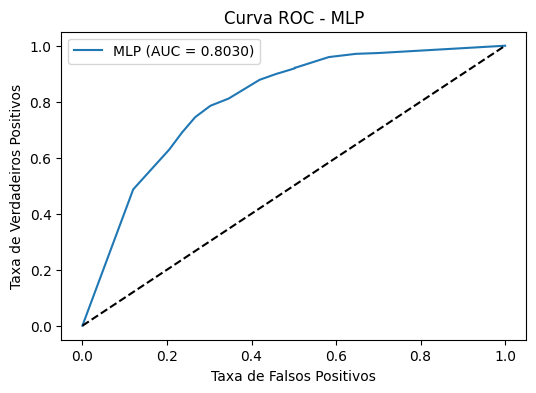

In [52]:
print("--- Avaliação do MLP ---")
y_pred_mlp = grid_search_mlp.best_estimator_.predict(x_teste)

print("Matriz de Confusão:")
cm_mlp = confusion_matrix(y_teste, y_pred_mlp)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - MLP')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

print("\nMétricas:")
print(f"Precisão: {precision_score(y_teste, y_pred_mlp):.4f}")
print(f"Revocação (Recall): {recall_score(y_teste, y_pred_mlp):.4f}")
print(f"F1-Score: {f1_score(y_teste, y_pred_mlp):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_teste, y_pred_mlp):.4f}")

# Curva ROC
if hasattr(grid_search_mlp.best_estimator_, "predict_proba"):
    y_prob_mlp = grid_search_mlp.best_estimator_.predict_proba(x_teste)[:, 1]
    fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_teste, y_prob_mlp)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_score(y_teste, y_prob_mlp):.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC - MLP')
    plt.legend()
    plt.show()


# **Etapa 4: Clustering e Segmentação**

**1. Aplicar KMeans:**  
Segmentar a base completa (sem a variável de churn).

**2. (Opcional) Testar DBSCAN:**  
Explorar clusters de formas arbitrárias.

**3. Analisar cada cluster quanto a:**  
- **Taxa média de churn**
- **Receita média mensal**
- **Uso de serviços extras:** DSL, telefonia, streaming

**4. Visualizar clusters em 2D:**  
Utilizar PCA ou t-SNE para projeção e visualização.

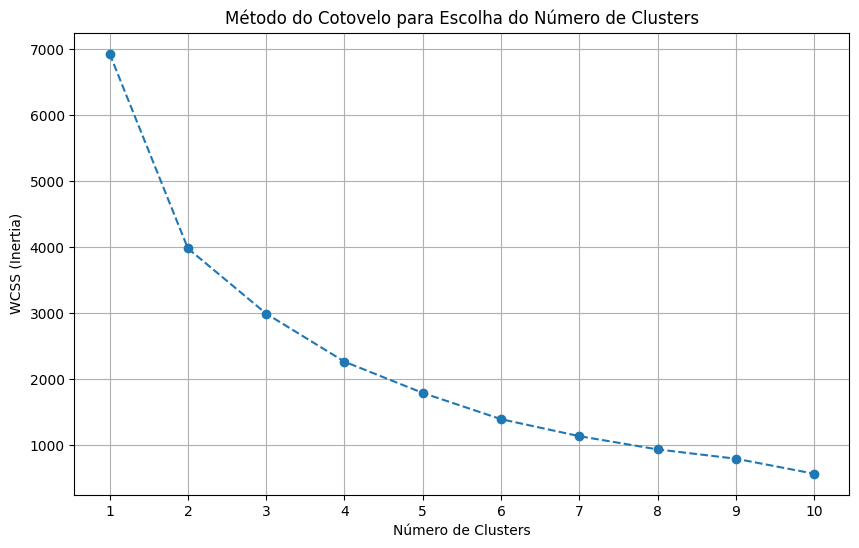

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Seleciona apenas as features para o KMeans (excluindo o target e colunas não numéricas)
X_cluster = x.select_dtypes(include=np.number)

# Método do Cotovelo (Elbow Method) para encontrar o número ideal de clusters
wcss = [] 
range_clusters = range(1, 11)  # Testar de 1 a 10 clusters

for i in range_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo para Escolha do Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()

In [54]:
# Seleciona apenas as features para o KMeans (excluindo o target e colunas não numéricas)
X_cluster = x.select_dtypes(include=np.number)

# Define o número de clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
dados['Cluster_KMeans'] = kmeans.fit_predict(X_cluster)

# Exibe a contagem de registros por cluster
print("Contagem de clientes por cluster:")
print(dados['Cluster_KMeans'].value_counts())

Contagem de clientes por cluster:
Cluster_KMeans
2    2640
3    2004
1    1516
0     850
Name: count, dtype: int64


In [55]:
# Agrupa os dados por cluster e calcula as métricas solicitadas
analise_cluster = dados.groupby('Cluster_KMeans').agg(
    Taxa_Media_Churn=('Churn_Yes', 'mean'),
    Uso_Medio_DSL=('InternetService_DSL', 'mean'),
    Uso_Medio_Telefonia=('PhoneService_Yes', 'mean'),
    Uso_Medio_Streaming_TV=('StreamingTV_Yes', 'mean'),
    Uso_Medio_Streaming_Filmes=('StreamingMovies_Yes', 'mean')
)

# Calcula a receita média mensal usando os dados originais (não escalonados)
receita_media_cluster = dados.groupby('Cluster_KMeans').apply(lambda x: dados_original.loc[x.index, 'MonthlyCharges'].mean())
analise_cluster['Receita_Media_Mensal'] = receita_media_cluster

# Reordena as colunas para uma melhor visualização
analise_cluster = analise_cluster[['Taxa_Media_Churn', 'Receita_Media_Mensal', 'Uso_Medio_DSL', 'Uso_Medio_Telefonia', 'Uso_Medio_Streaming_TV', 'Uso_Medio_Streaming_Filmes']]

# Exibe a análise
print("Análise dos Clusters:")
display(analise_cluster)

Análise dos Clusters:


C:\Users\maykon\AppData\Local\Temp\ipykernel_21488\87755261.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  receita_media_cluster = dados.groupby('Cluster_KMeans').apply(lambda x: dados_original.loc[x.index, 'MonthlyCharges'].mean())


,Taxa_Media_Churn,Receita_Media_Mensal,Uso_Medio_DSL,Uso_Medio_Telefonia,Uso_Medio_Streaming_TV,Uso_Medio_Streaming_Filmes
Cluster_KMeans,,,,,,
0,0.165882,63.993353,0.167059,0.949412,0.077647,0.090588
1,0.304749,66.024934,0.281003,0.889842,0.552111,0.560686
2,0.058333,65.205625,0.388258,0.910606,0.438636,0.442045
3,0.551397,63.607510,0.408683,0.884232,0.314371,0.313373


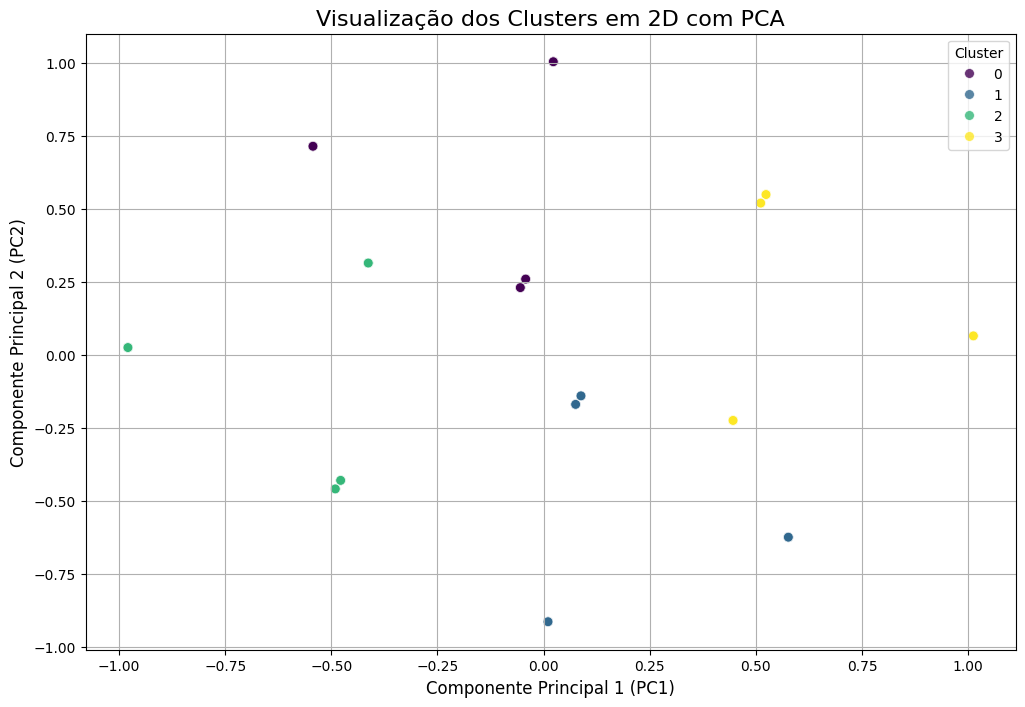

In [56]:
# Reduzir a dimensionalidade com PCA para 2 componentes
pca_cluster = PCA(n_components=2)
X_pca_cluster = pca_cluster.fit_transform(X_cluster)

# Criar um DataFrame com os componentes principais e os clusters
pca_df_cluster = pd.DataFrame(data=X_pca_cluster, columns=['PC1', 'PC2'], index=X_cluster.index)
pca_df_cluster['Cluster'] = dados['Cluster_KMeans']

# Visualizar os clusters em 2D
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=pca_df_cluster,
    palette='viridis',
    alpha=0.8,
    s=50
)

plt.title('Visualização dos Clusters em 2D com PCA', fontsize=16)
plt.xlabel('Componente Principal 1 (PC1)', fontsize=12)
plt.ylabel('Componente Principal 2 (PC2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()